In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
%matplotlib inline

xTrain = pd.read_csv('RNA_Database.csv', header=0)
print(xTrain.head())

   Number_of_Motifs  Clashes  Geometry  Density
0                 1    21.14     28.57      0.0
1                 5     0.00      0.00      0.0
2                10     3.22      1.85      3.7
3                 1     0.00     19.15      0.0
4               639     0.00     19.15      0.0


In [7]:
RNAmol = xTrain['Clashes'] # save for comparison
xTrain = scale(xTrain.drop(labels='Density', axis=1), 
               with_mean=True, with_std=True)
print(xTrain)

[[-0.44003438  0.22409917  0.49346533]
 [-0.42718361 -0.66879396 -1.1316279 ]
 [-0.41112015 -0.53279037 -1.02639785]
 ...
 [-0.41433284  1.46333684  1.63734439]
 [-0.41433284 -0.40016575 -0.00879485]
 [-0.44324707 -0.66879396 -1.1316279 ]]


Text(0, 0.5, 'Sum-of-squares')

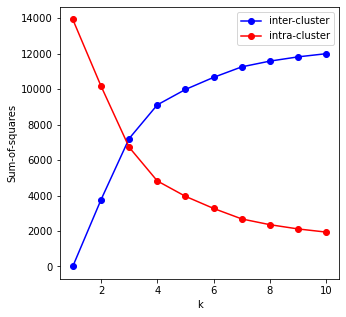

In [8]:
# Initialise some variables
kRange = range(1, 11)
intra = np.empty(len(kRange)) # intracluster sum-of-squares
inter = np.empty(len(kRange)) # intercluster sum-of-squares

# Loop across desired range of ks
for k in kRange:
    mdl = KMeans(n_clusters=k)
    mdl.fit(X=xTrain)
    intra[k-1] = mdl.inertia_ 
    inter[k-1] = np.sum(scale(xTrain, with_std=False)**2) - mdl.inertia_

# Plot inter/intercluster sum-of-squares as a function of $k$
plt.figure(figsize=(5,5))
plt.plot(kRange, inter, 'bo-', label='inter-cluster')
plt.plot(kRange, intra, 'ro-', label='intra-cluster')
plt.legend(loc='upper right')
plt.xlabel('k')
plt.ylabel('Sum-of-squares')

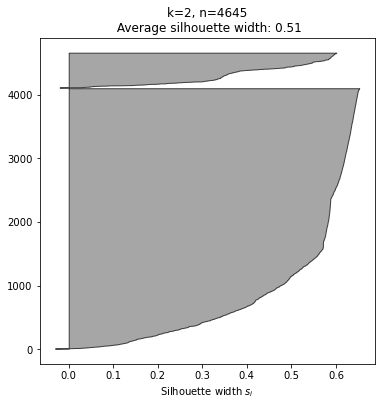

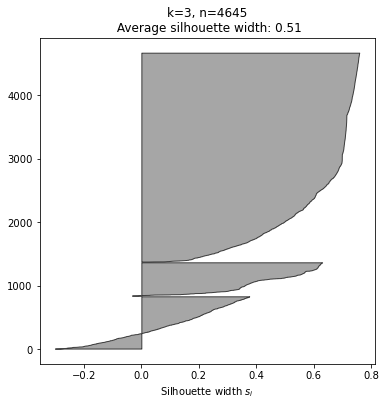

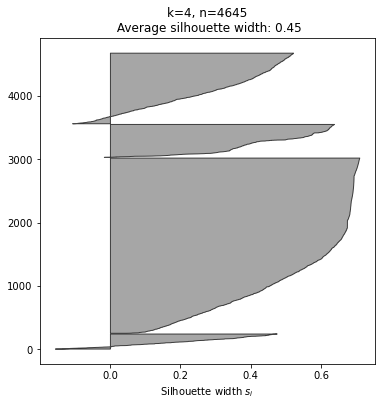

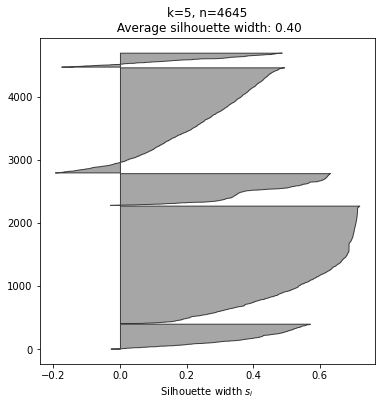

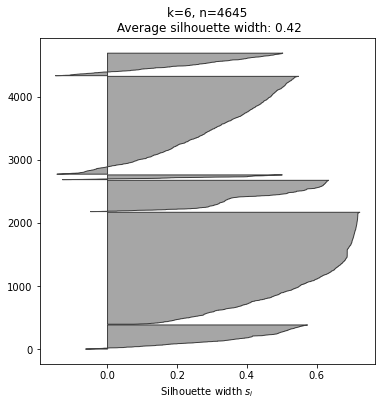

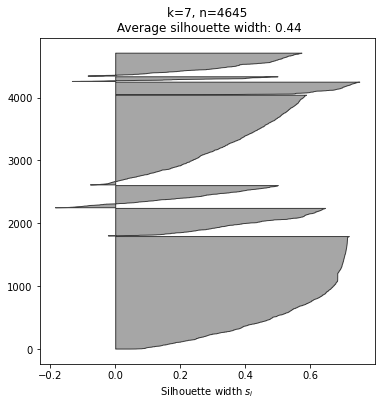

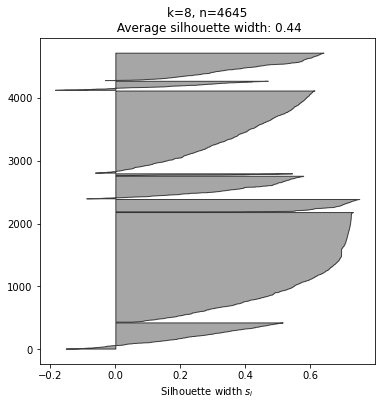

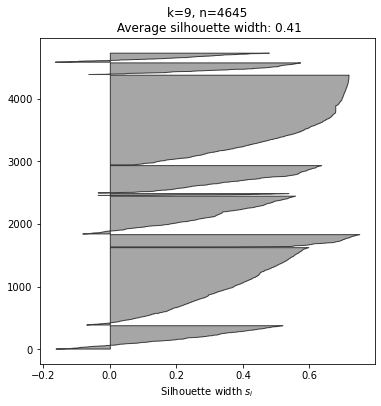

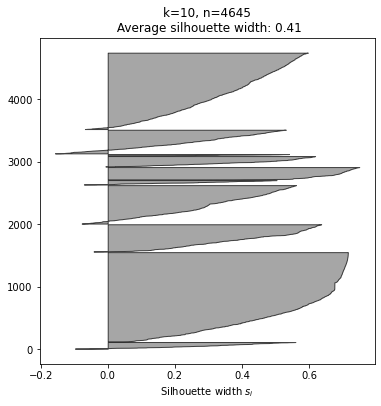

In [11]:
# Unfortunately in scikit-learn there is not a readily available function
# to plot silhouettes, so we will have to write one ourselves
# Adapted from scikit-learn:
from sklearn.metrics import silhouette_samples, silhouette_score
import numpy as np

#===================================================================#
def plot_silhouette(mdl, xTrain):
    """
    Plots a silhouette plot for a k-means object mdl
    It also requires the training data xTrain
    """
    # Compute the silhouette scores for all samples
    clustLabels = mdl.labels_
    silhScores = silhouette_samples(xTrain, clustLabels)
    
    # Loop across all clusters
    hFig = plt.figure(figsize=(6,6))
    yMin = 10
    for i in range(mdl.n_clusters):
        # Aggregate scores for that cluster and sort them
        thisSilhScores = silhScores[clustLabels == i]
        thisSilhScores.sort()
        
        # Set plot limits and plot
        yMax = yMin + len(thisSilhScores)
        plt.fill_betweenx(np.arange(yMin, yMax), 0, thisSilhScores, 
                          facecolor='grey', edgecolor='black', alpha=0.7)
        plt.xlabel('Silhouette width $s_i$')
        plt.title('k={}, n={}\n Average silhouette width: {:.2f}'\
                  .format(mdl.n_clusters, xTrain.shape[0], np.mean(silhScores)))
        avg_score = np.mean(silhScores)
        plt.plot(avg_score, 'r--')
        # Leave space before plotting next cluster
        yMin = yMax + 10
        
    # Show plot
    plt.show()
    
    return hFig
    
#===================================================================#
    
# Initialise some variables
kRange = range(2, 11)
avgWidth = np.empty(len(kRange))

# Loop across desired range of ks
for k in kRange:
    mdl = KMeans(n_clusters=k).fit(X=xTrain)
    avgWidth[k-2] = silhouette_score(xTrain, mdl.labels_)
    plot_silhouette(mdl, xTrain)

# Plot average width as a function of k

Text(0, 0.5, 'Average silhouette width')

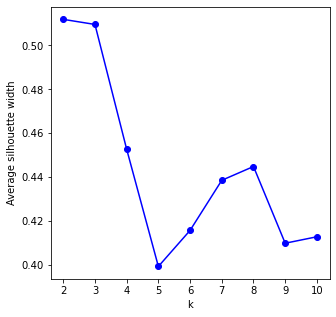

In [12]:
plt.figure(figsize=(5,5))
plt.plot(kRange, avgWidth, 'bo-')
plt.xlabel('k')
plt.ylabel('Average silhouette width')